**Imports**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


##### Generating samples

In [2]:
SAMPLE_SIZE = 1000
SAMPLES_NUMBER = 10000

samples = np.random.normal(0, 1, (SAMPLES_NUMBER, SAMPLE_SIZE))

##### Calculating statistics

In [3]:
means = np.mean(samples, axis=1)

variances = np.var(samples, axis=1)

medians = np.median(samples, axis=1)

##### Calculating nF(xr), n(1-F(x(n+1-s)): Теорема об асимптотическом поведении крайних членов вариационного ряда

In [4]:
variational_series = np.sort(samples, axis=1)
X2 = variational_series[:, 1]
Xn2 = variational_series[:, -3]
nF_X2 = SAMPLE_SIZE * stats.norm.cdf(X2)
n1_F_Xn2 = SAMPLE_SIZE * (1 - stats.norm.cdf(Xn2))

##### Visualization, histograms

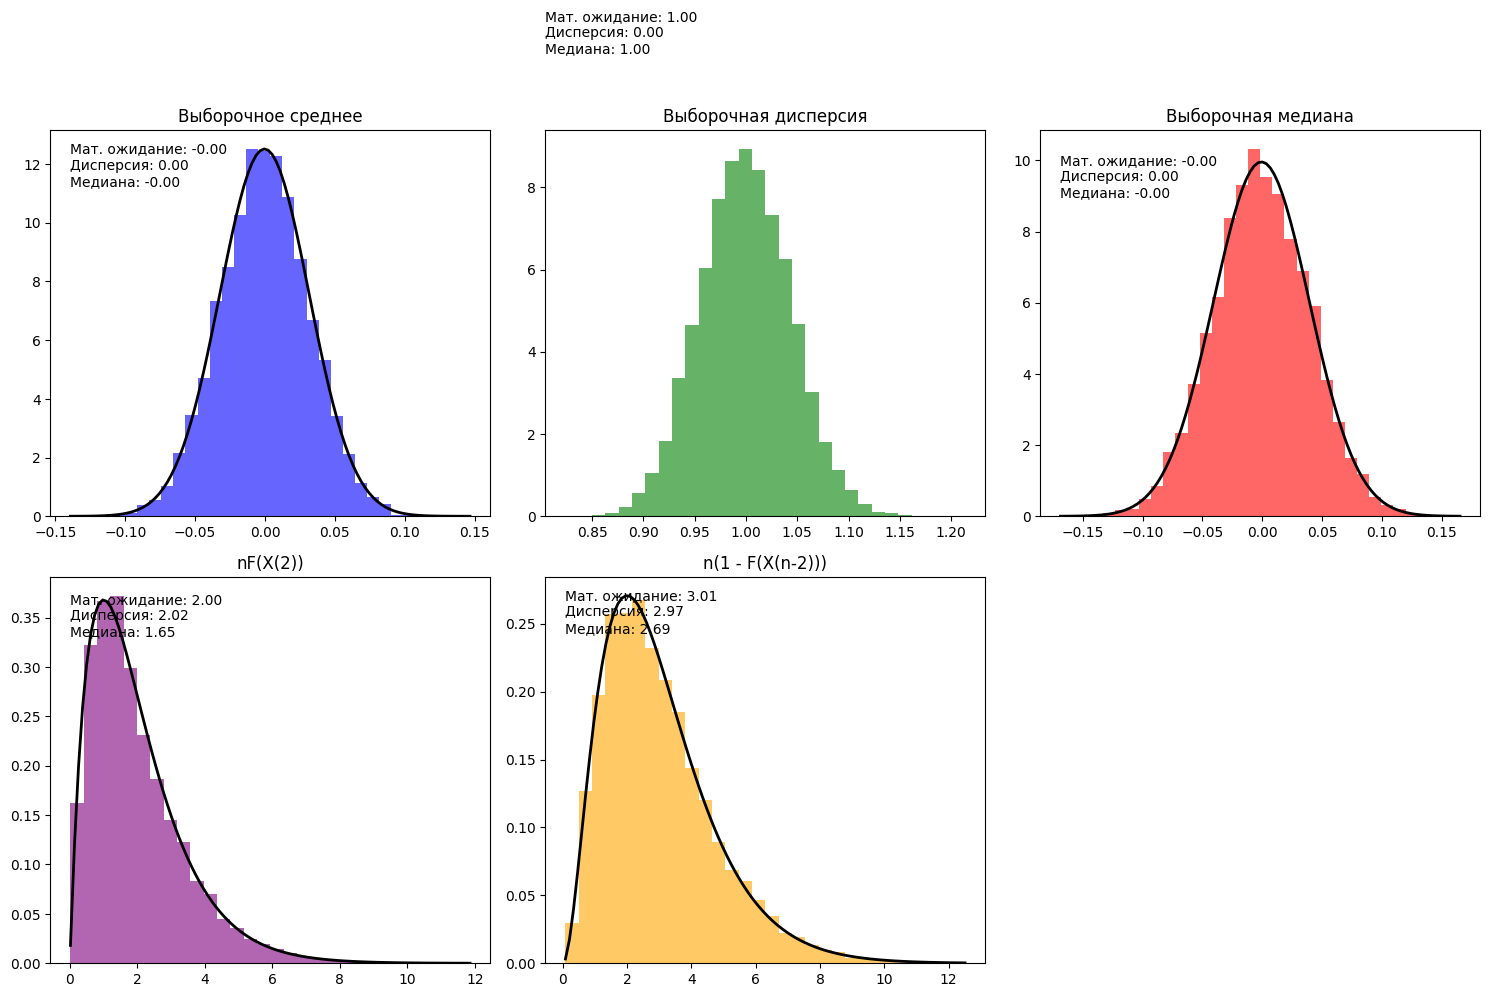

In [5]:
plt.figure(figsize=(15, 10))

# Гистограмма выборочного среднего
plt.subplot(2, 3, 1)
plt.hist(means, bins=30, density=True, alpha=0.6, color='b')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, np.mean(means), np.std(means))
plt.plot(x, p, 'k', linewidth=2)
plt.title('Выборочное среднее')
plt.text(xmin, max(p) * 0.9, f"Мат. ожидание: {np.mean(means):.2f}\nДисперсия: {np.var(means):.2f}\nМедиана: {np.median(means):.2f}")

# Гистограмма выборочной дисперсии
plt.subplot(2, 3, 2)
plt.hist(variances, bins=30, density=True, alpha=0.6, color='g')
plt.title('Выборочная дисперсия')
xmin, xmax = plt.xlim()
plt.text(xmin, max(p) * 0.9, f"Мат. ожидание: {np.mean(variances):.2f}\nДисперсия: {np.var(variances):.2f}\nМедиана: {np.median(variances):.2f}")

# Гистограмма выборочной медианы
plt.subplot(2, 3, 3)
plt.hist(medians, bins=30, density=True, alpha=0.6, color='r')
plt.title('Выборочная медиана')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, np.mean(medians), np.std(medians))
plt.plot(x, p, 'k', linewidth=2)
plt.text(xmin, max(p) * 0.9, f"Мат. ожидание: {np.mean(medians):.2f}\nДисперсия: {np.var(medians):.2f}\nМедиана: {np.median(medians):.2f}")

# Гистограмма для nF(X(2))
plt.subplot(2, 3, 4)
plt.hist(nF_X2, bins=30, density=True, alpha=0.6, color='purple')
x = np.linspace(min(nF_X2), max(nF_X2), 100)
plt.plot(x, stats.gamma.pdf(x, a=2, scale=1), 'k', linewidth=2)
plt.title('nF(X(2))')
plt.text(min(nF_X2), max(stats.gamma.pdf(x, a=2, scale=1)) * 0.9, 
         f"Мат. ожидание: {np.mean(nF_X2):.2f}\nДисперсия: {np.var(nF_X2):.2f}\nМедиана: {np.median(nF_X2):.2f}")

# Гистограмма для n(1 - F(X(n-2)))
plt.subplot(2, 3, 5)
plt.hist(n1_F_Xn2, bins=30, density=True, alpha=0.6, color='orange')
x = np.linspace(min(n1_F_Xn2), max(n1_F_Xn2), 100)
plt.plot(x, stats.gamma.pdf(x, a=3, scale=1), 'k', linewidth=2)
plt.title('n(1 - F(X(n-2)))')
plt.text(min(n1_F_Xn2), max(stats.gamma.pdf(x, a=3, scale=1)) * 0.9, 
         f"Мат. ожидание: {np.mean(n1_F_Xn2):.2f}\nДисперсия: {np.var(n1_F_Xn2):.2f}\nМедиана: {np.median(n1_F_Xn2):.2f}")

plt.tight_layout()
plt.show()
